In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [10]:
data = pd.read_csv('data/soybean-large_data.csv', keep_default_na='?')

In [11]:
data.head()

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [12]:
# Работа с пропущенными значениями (NA)
data.isnull().sum()

name               0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [13]:
# Look for different values of variables
for col in list(data):
    print(col)
    print(np.sort(data[col].unique()))

name
['2-4-d-injury' 'alternarialeaf-spot' 'anthracnose' 'bacterial-blight'
 'bacterial-pustule' 'brown-spot' 'brown-stem-rot' 'charcoal-rot'
 'cyst-nematode' 'diaporthe-pod-&-stem-blight' 'diaporthe-stem-canker'
 'downy-mildew' 'frog-eye-leaf-spot' 'herbicide-injury'
 'phyllosticta-leaf-spot' 'phytophthora-rot' 'powdery-mildew'
 'purple-seed-stain' 'rhizoctonia-root-rot']
date
['0' '1' '2' '3' '4' '5' '6' '?']
plant-stand
['0' '1' '?']
precip
['0' '1' '2' '?']
temp
['0' '1' '2' '?']
hail
['0' '1' '?']
crop-hist
['0' '1' '2' '3' '?']
area-damaged
['0' '1' '2' '3' '?']
severity
['0' '1' '2' '?']
seed-tmt
['0' '1' '2' '?']
germination
['0' '1' '2' '?']
plant-growth
['0' '1' '?']
leaves
[0 1]
leafspots-halo
['0' '1' '2' '?']
leafspots-marg
['0' '1' '2' '?']
leafspot-size
['0' '1' '2' '?']
leaf-shread
['0' '1' '?']
leaf-malf
['0' '1' '?']
leaf-mild
['0' '1' '2' '?']
stem
['0' '1' '?']
lodging
['0' '1' '?']
stem-cankers
['0' '1' '2' '3' '?']
canker-lesion
['0' '1' '2' '3' '?']
fruiting-bodi

We have '?' values in many variables. Let's make it NA value and remove all records with NA.

In [14]:
data2 = pd.read_csv('data/soybean-large_data.csv', na_values='?')
len(data2)

307

In [15]:
data2_noNA= data2.dropna()
len(data2_noNA)

266

So we didn't lose much data

In [16]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))


In [17]:
rows= []

for var1 in data2_noNA:
    col = []
    for var2 in data2_noNA :
        cramers =cramers_V(data2_noNA[var1], data2_noNA[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data2_noNA.columns, index =data2_noNA.columns)



df.head()

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
name,1.00,0.17,0.27,0.52,0.30,0.18,0.06,0.22,0.39,0.08,...,1.00,1.00,0.81,0.70,0.69,0.68,0.55,0.40,0.38,0.30
date,0.17,1.00,0.10,0.04,0.08,0.02,0.02,0.04,0.10,0.05,...,0.04,0.03,0.22,0.09,0.03,0.00,0.05,0.03,0.07,0.03
plant-stand,0.27,0.10,0.98,0.03,0.06,0.00,0.02,0.05,0.04,0.01,...,0.04,0.02,0.13,0.04,0.01,0.00,0.03,0.00,0.00,0.02
precip,0.52,0.04,0.03,1.00,0.00,0.03,0.02,0.04,0.10,0.01,...,0.32,0.23,0.05,0.04,0.03,0.03,0.02,0.01,0.01,0.02
temp,0.30,0.08,0.06,0.00,1.00,0.01,0.03,0.04,0.10,0.01,...,0.02,0.03,0.14,0.10,0.01,0.01,0.01,0.02,0.01,0.01
hail,0.18,0.02,0.00,0.03,0.01,0.98,0.03,0.01,0.00,0.00,...,0.02,0.01,0.01,0.02,0.02,0.01,0.04,0.00,0.00,0.00
crop-hist,0.06,0.02,0.02,0.02,0.03,0.03,1.00,0.08,0.03,0.01,...,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.00,0.01,0.01
area-damaged,0.22,0.04,0.05,0.04,0.04,0.01,0.08,1.00,0.05,0.04,...,0.04,0.03,0.15,0.03,0.02,0.01,0.00,0.01,0.02,0.02
severity,0.39,0.10,0.04,0.10,0.10,0.00,0.03,0.05,1.00,0.00,...,0.04,0.03,0.21,0.18,0.03,0.03,0.08,0.01,0.01,0.01
seed-tmt,0.08,0.05,0.01,0.01,0.01,0.00,0.01,0.04,0.00,1.00,...,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00


<Figure size 4800x3200 with 0 Axes>

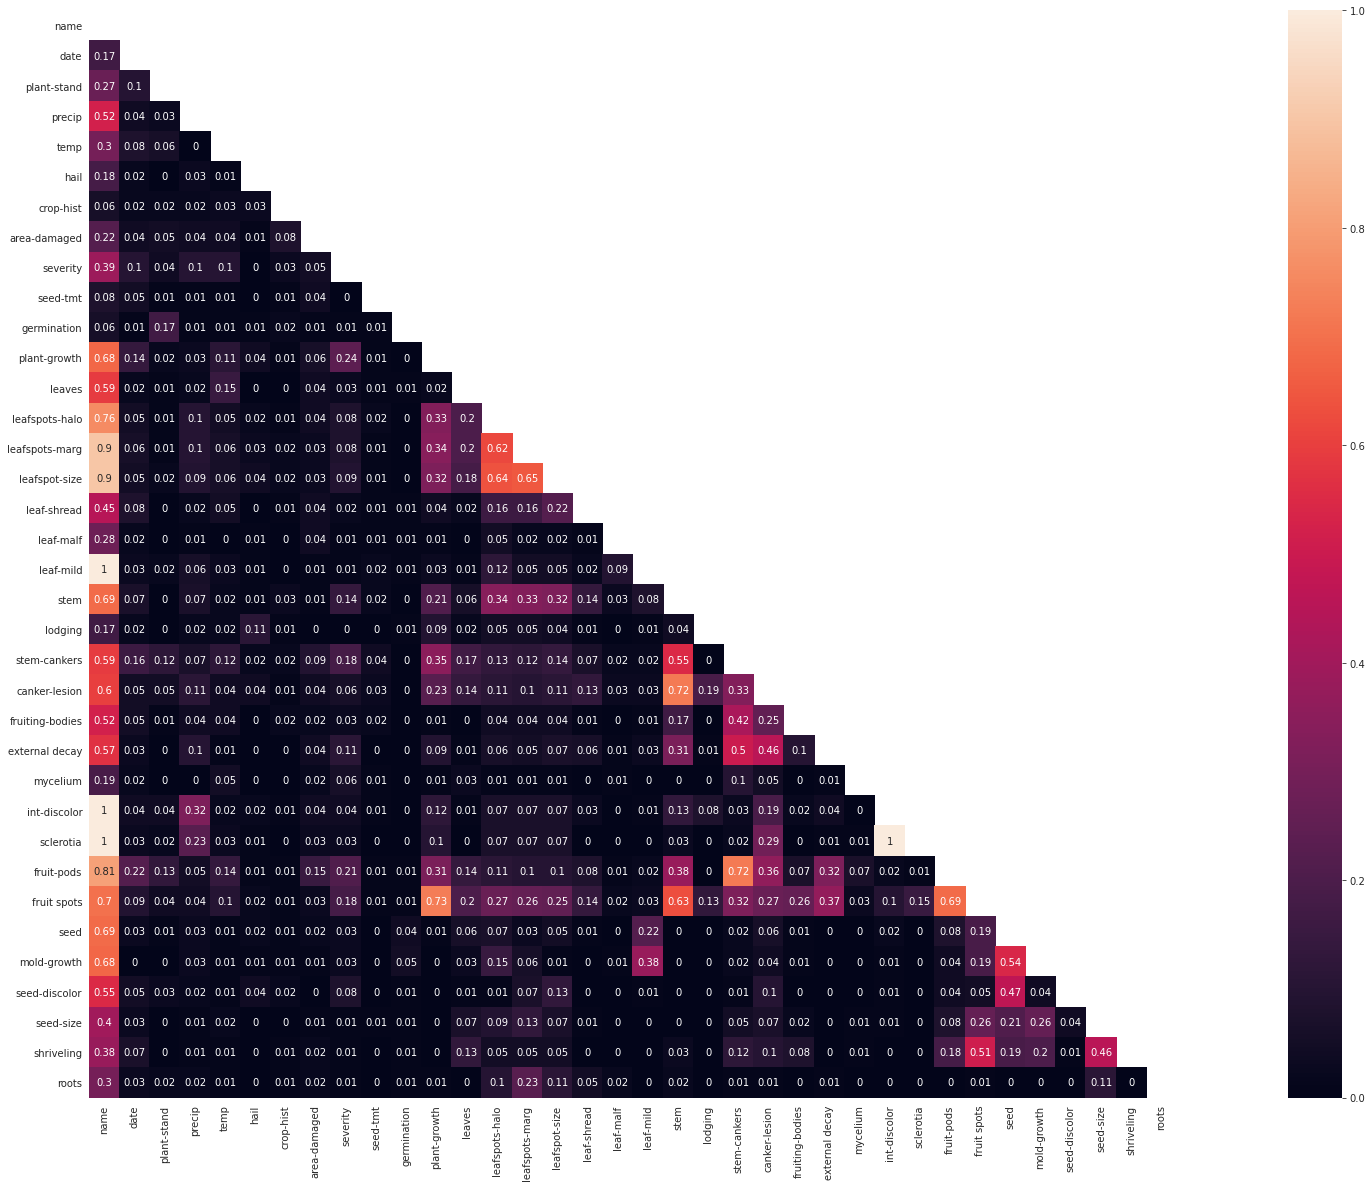

In [40]:
plt.figure(dpi=800)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 20))
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True,annot=True, annot_kws={"size": 10})

plt.show()

We see the high variable correlation (~0.5):
stem - fruit spots
stem - stem-cankers
stem - canker-lesion
stem-cankers - fruit-pods
stem-cankers - external decay
cankers-lesion - external decay
fruit spots - fruit pods
fruit spots - shriveling
leafspots-marg - leafspots-halo
leafspot-size - leafspots-halo
seed - mold-growth
seed - seed-discolor
seed-size - shriveling

In [43]:
# drop some of that variables:
data_drop_cor = data2_noNA.drop(['fruit spots','stem-cankers','canker-lesion',
                                 'leafspots-marg','leafspot-size','mold-growth'], axis=1)

In [46]:
X = data_drop_cor.drop('name', axis=1)
y = data_drop_cor.name

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train , y_test = train_test_split(X, y,stratify=y, test_size=0.33, random_state = 0)

In [51]:
rf = RandomForestClassifier(random_state=0)

In [52]:
params = {'n_estimators':list(range(10,60,10)), 
          'max_depth':list(range(1,13,2)),
         'min_samples_leaf':list(range(1,8)),
         'min_samples_split':list(range(2,10,2))}
params

{'max_depth': [1, 3, 5, 7, 9, 11],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
 'min_samples_split': [2, 4, 6, 8],
 'n_estimators': [10, 20, 30, 40, 50]}

In [101]:
grid_search_rf = GridSearchCV(rf, params,cv=4, n_jobs= -1)

In [102]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [103]:
grid_search_rf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [104]:
best_rf = grid_search_rf.best_estimator_

In [105]:
predicted = best_rf.predict(X_test)

In [106]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

                        precision    recall  f1-score   support

   alternarialeaf-spot       0.54      1.00      0.70        13
           anthracnose       1.00      0.86      0.92         7
      bacterial-blight       1.00      0.25      0.40         4
     bacterial-pustule       1.00      0.67      0.80         3
            brown-spot       0.92      0.92      0.92        13
        brown-stem-rot       1.00      1.00      1.00         7
          charcoal-rot       1.00      1.00      1.00         3
 diaporthe-stem-canker       0.80      1.00      0.89         4
          downy-mildew       1.00      1.00      1.00         3
    frog-eye-leaf-spot       1.00      0.54      0.70        13
phyllosticta-leaf-spot       1.00      0.50      0.67         4
      phytophthora-rot       1.00      1.00      1.00         5
        powdery-mildew       1.00      1.00      1.00         3
     purple-seed-stain       0.75      1.00      0.86         3
  rhizoctonia-root-rot       1.00      

We see problem with recall in bacterial-blight, frog-eye-leaf-spot, phyllosticta-leaf-spot classes, so we have frequent false negative errors when defining these classes. The problem with precision, i.e. with false possitive errors, is only present in the alternarialeaf-spot class

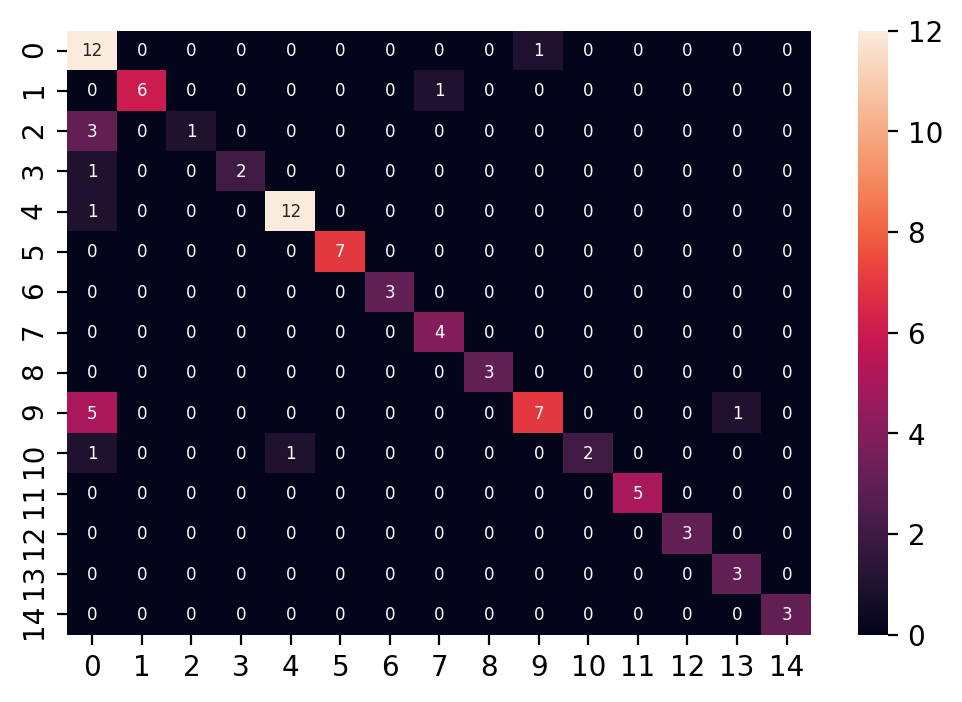

In [93]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=200)
conf_matrx = confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrx,annot=True,annot_kws={"size": 6})

On confusion matrix we see a lot of false positive errors for predictions class 0 (alternarialeaf-spot).

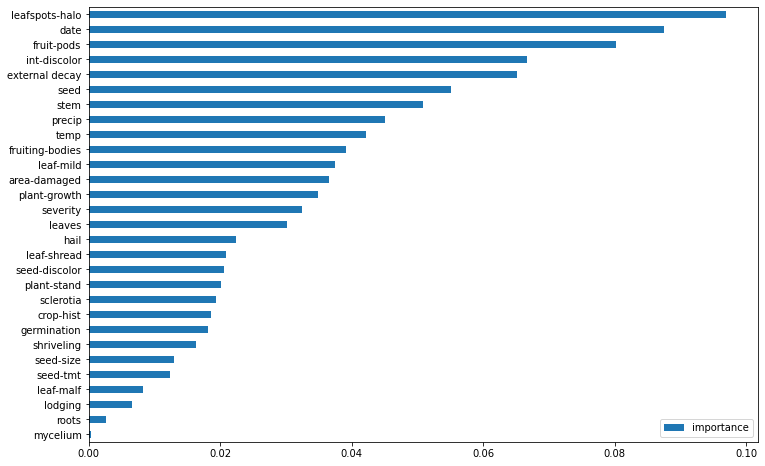

In [75]:
#  Let's look on feature importances
imp = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

We see that leafspots-halo, date, fruit-pods are the most important variables for prediction.